## Predictive Modeling
### on California housing dataset from sklearn
#### Algorithms used - Decision Tree and Elastic Net

1. Choose a class of model
2. Optimize model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

Now, we are going to put all this together to build a predictive model to use in real-life scenarios.
http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn context and style.
sns.set_style('whitegrid')
sns.set_context('talk')

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

For this assignment, we will use California housing dataset.

In [2]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target

print(f'There are {X.shape[0]:d} datapoints with {X.shape[1]:d} features.')
print(f'Features are {", ".join(dataset.feature_names)}.')

There are 20640 datapoints with 8 features.
Features are MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude.


### Explore the dataset to understand how data is structured

In [3]:
dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

From the above dataset description, below 
- This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.Census Bureau publishes sample data
- There are 20640 instances and 8 numeric, predictive attributes and 1 target variable
- The target variable is the median house value for California districts
- Check http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html for more details

#### Let's take a look at actual data

In [4]:
# Get data into pandas dataframe and target in series
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Let's get various summary statistics for the data

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Now, take a look at data structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


- Above is the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
- All the 9 data columns are non-null and of float type. Index dtype is float64(9) and memoray usage is 1.4 MB.

Another way to check if data has null/misiing values is as below

In [7]:
print('Let\'s check for null values\n')
print(df.isnull().sum())

Let's check for null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


There are no null/missing values in california housing dataset which we also got from info() method.

#### Now just plot the histogram for each feature

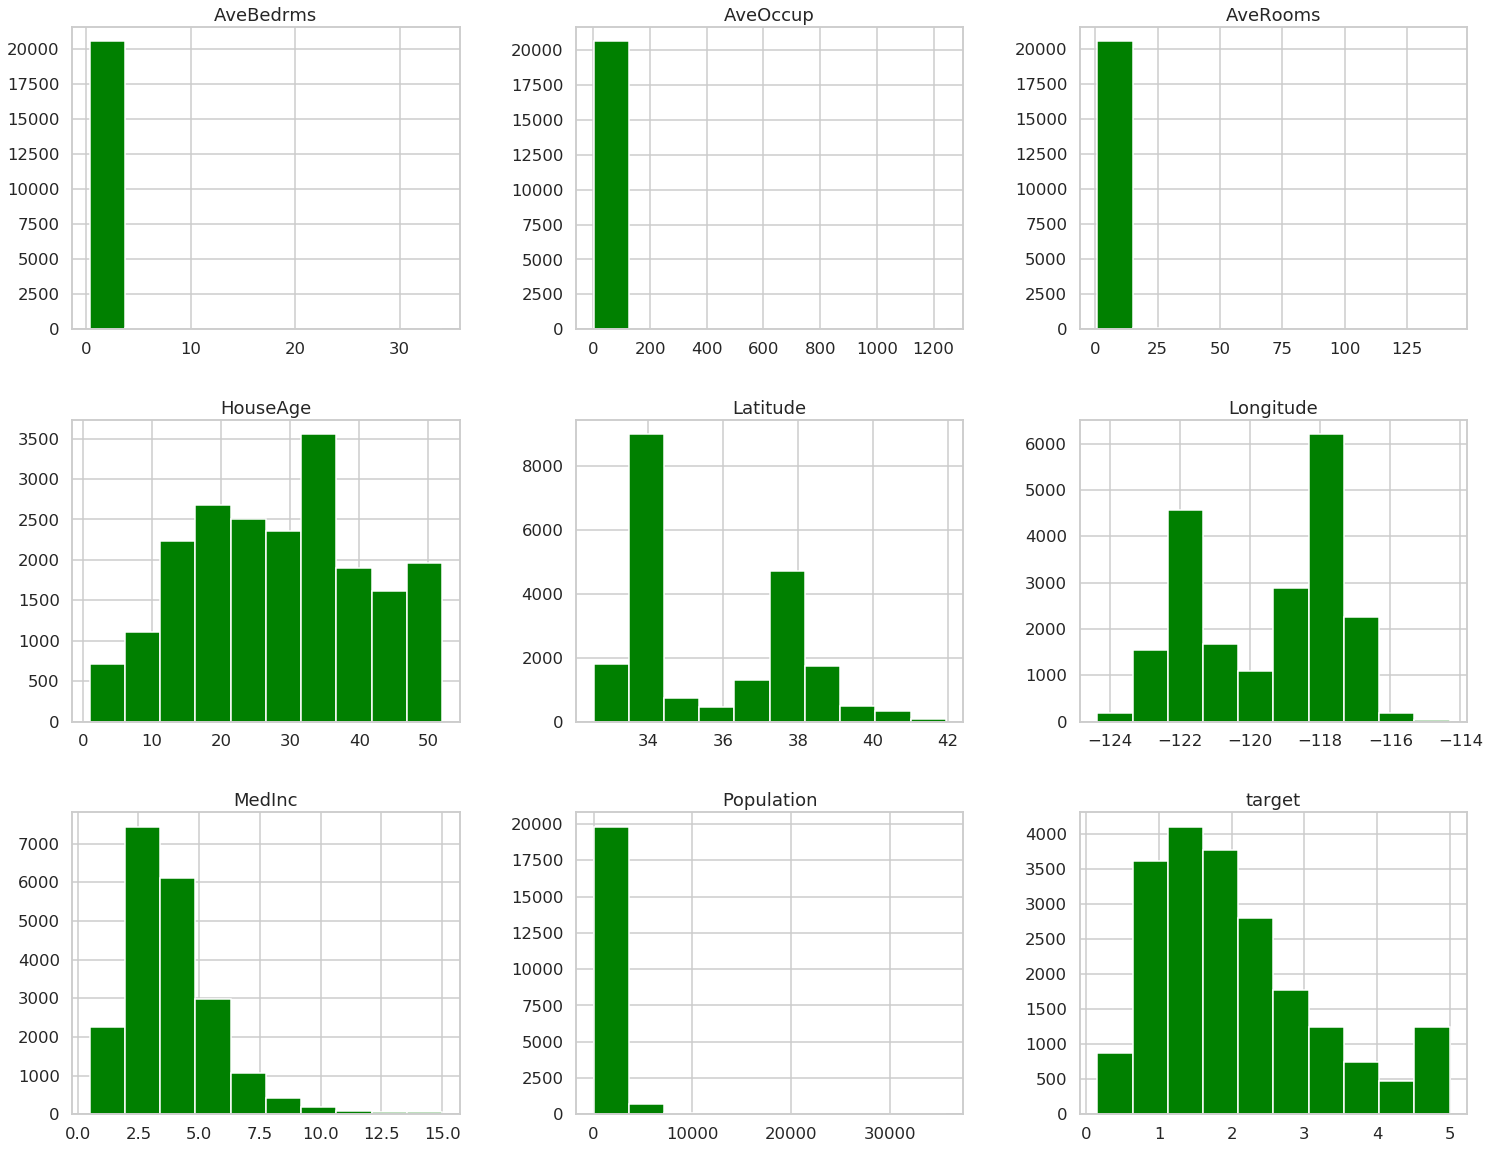

In [8]:
# Histograms of all variables
df.hist(figsize=(25,20), color = 'green')
plt.show()

Above histogram results for each variable helps us access the key characteristics of the data such as:
- Peaks in a particular data column
- Observe Spread of the data column
- Symmetry of each variable in data
- Normality or skewness in data
- Identify outliers in data
- Distribution of each variable in the data

#### Observe correlation between each data column

In [9]:
# Correlation heatmap of data
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def heatmap():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "13pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '13pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover over to magnify")\
    .set_precision(2)\
    .set_table_styles(heatmap())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1,-0.12,0.33,-0.062,0.0048,0.019,-0.08,-0.015,0.69
HouseAge,-0.12,1,-0.15,-0.078,-0.3,0.013,0.011,-0.11,0.11
AveRooms,0.33,-0.15,1,0.85,-0.072,-0.0049,0.11,-0.028,0.15
AveBedrms,-0.062,-0.078,0.85,1,-0.066,-0.0062,0.07,0.013,-0.047
Population,0.0048,-0.3,-0.072,-0.066,1,0.07,-0.11,0.1,-0.025
AveOccup,0.019,0.013,-0.0049,-0.0062,0.07,1,0.0024,0.0025,-0.024
Latitude,-0.08,0.011,0.11,0.07,-0.11,0.0024,1,-0.92,-0.14
Longitude,-0.015,-0.11,-0.028,0.013,0.1,0.0025,-0.92,1,-0.046
target,0.69,0.11,0.15,-0.047,-0.025,-0.024,-0.14,-0.046,1


- For our initial exploration of the dataset, above correlation plot helps us understand how different features are correlated to each other.
- We can see that, target variable is highly correlated to MedInc and weak correlation with AveRooms
- No other significant correlation between target and other features other tah MedInc.

#### Let's analyse and plot the distribution of target i.e. Median House Value.

In [10]:
df['target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

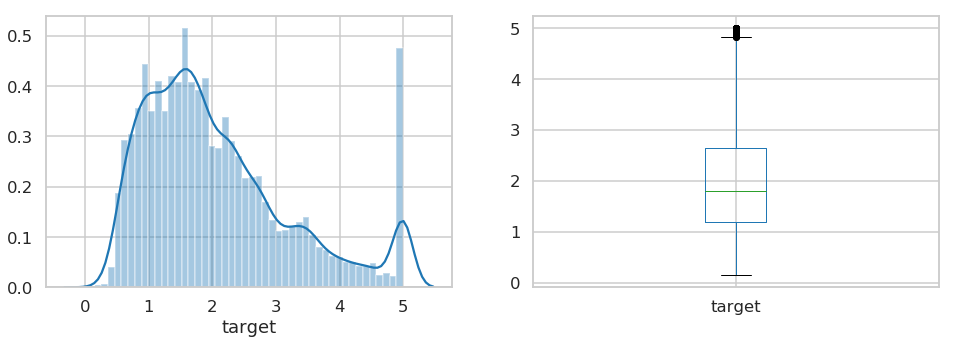

In [11]:
# Plot distribution and box plot of target
plt.figure(1)

plt.subplot(121)
sns.distplot(df['target']);

plt.subplot(122)
df['target'].plot.box(figsize=(16,5))

plt.show()

- The target variable - median house value is not normally distributed as per the shape we observe in above distribution plot.
- The mean of the data is around 2 and data ranges from 0 to 5 with standard deviation of about 1.15.

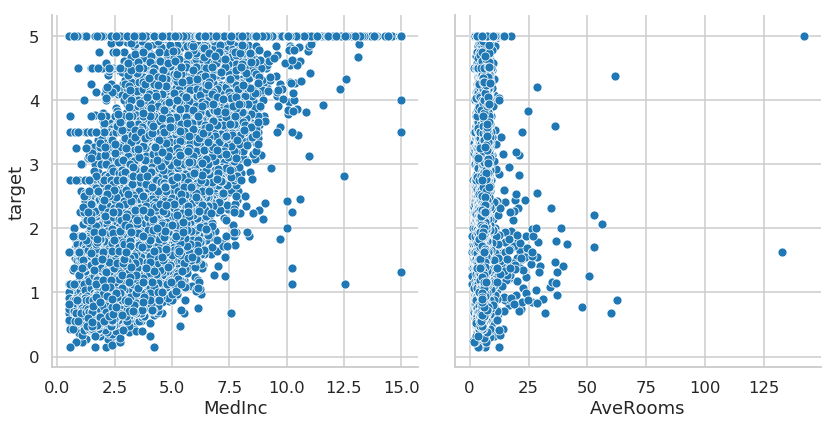

In [12]:
# Scatterplot of target vs MedInc & AveRooms
MedInc = df['MedInc']
AveRooms = df['AveRooms']
target = df['target']

# get required attributes
data = pd.DataFrame({"MedInc": MedInc,
                   "AveRooms": AveRooms,
                   "target": target})

# plot chosen attributes against target variable
pp = sns.pairplot(data=data,
                  x_vars=['MedInc','AveRooms'],
                  y_vars=['target'],height=6, aspect=1)

MedInc is positively correlated with target while AveRoom has very weak correlation with target.
***

### Split dataset into two: cross-validation and test datasets.

In [13]:
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.20)

### Using cross-validation dataset, run parameter searches with 3-fold cross-validation on DecisionTreeRegressor and ElasticNet to find the best model. (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

#### DecisionTreeRegressor

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Decide parameters to serch
n_features = X_cv.shape[1]
max_depths = np.arange(1, n_features + 1)

param_grid = {'max_depth': max_depths,
             'max_features': max_depths}

# Perform Search with Decision Tree Regressor
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring = "r2")
grid_dt.fit(X_cv, y_cv)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

- The first parameter I chose to tune is max_depth. max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 
- I fit a decision tree regressor with **max_depth parameter depths ranging from 1 to 8**
- The second parameter I chose to tune is max_features. max_features represents the number of features to consider when looking for the best split.
- I fit a decision tree regressor with **n_features parameter for all the 8 features** to consider for the best split.

In [15]:
# Print best parameters values and r2 score.
print('The best parameters are:', grid_dt.best_params_)
print(f'The r2 score is: {grid_dt.best_score_:.0%}')

The best parameters are: {'max_depth': 8, 'max_features': 6}
The r2 score is: 68%


- Best max_depth and max_feature are as shown above with r2 score of 68% which can be considered a good score depending on requirement

#### ElasticNet

In [16]:
from sklearn.linear_model import ElasticNet

# Decide parameters to serch
alphas = np.logspace(-5, 1, 10)
l1_ratios = np.linspace(0, 1, 10)

param_grid = {'alpha': alphas,
             'l1_ratio': l1_ratios}

#Perform Search with Elastic Net
grid_en = GridSearchCV(ElasticNet(), param_grid, cv=3, scoring = "r2")
grid_en.fit(X_cv, y_cv)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-05, 4.64159e-05, 2.15443e-04, 1.00000e-03, 4.64159e-03,
       2.15443e-02, 1.00000e-01, 4.64159e-01, 2.15443e+00, 1.00000e+01]), 'l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

- As the Elastic Net addresses the problem of over-regularization by balancing between LASSO and ridge penalties.
- The first parameter I chose to tune is alpha, in which a value between 0 and 1 for elastic net regression used.
- Hence, I am using parameter **alpha for 60 values between  10^−5  and 10.** (e.g. 0.01, 0.1, 0.2 etc ...)
- The second parameter I chose to tune is l1_ratio, the ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2(Ridge) penalty. For l1_ratio = 1 it is an L1(Lasso) penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
- Therefore, for elastic net I am using **l1_ratio for 10 evenly spaced numbers between 0 and 1.** (e.g. 0.11, 0.22 ..)

In [17]:
# Print best parameters values and acc score.
print('The best parameters are:', grid_en.best_params_)
print(f'The best r2 score is: {grid_en.best_score_:.0%}')

The best parameters are: {'alpha': 0.004641588833612777, 'l1_ratio': 0.0}
The best r2 score is: 60%


- Best alpha and l1_ratio parameter values are as shown above with r2 score of 60% which is lesser than decision tree regressor model r2-score.
***

### Refit the model with the best score using the parameters found on the whole CV dataset and measure the performance on the hold-out test dataset. Compare this to CV score

In [18]:
# Fit model with best score
cls = DecisionTreeRegressor(**grid_dt.best_params_)
cls.fit(X_cv, y_cv)   

# See how the model performs
acc_score = cls.score(X_test, y_test) * 100.0
print('R2 score is %.2f' % acc_score,'%') 

# Get predicted values
y_pred = cls.predict(X_test)

R2 score is 67.08 %


- As, my decision tree regressor score was more than elastic net, I used Decision tree regressor model and its best parameters obtained from above to fit model on the whole CV dataset.
- The performance is measured on the hold-out test dataset so that we get correct score for test dataset.
- I found that the performance score on hold-out test dataset is slightly lower then CV dataset. 
- This is as expected because, in CV score, the accuracy of a model was calculated on observations it was constructed on. But here the accuracy of a model was calculated on observations it hasn't seen.
- But still we got an accuracy of about 67% which is considered to be a good fit model. We can further analyze this using residuals for the test dataset as given below.
***

### Analyze residuals for the test dataset

In all model building assumptions are made, and certain conditions also required to be approximately met for purposes of estimation. Carefully looking at residuals can tell us whether our assumptions are reasonable and our choice of model is appropriate. 
**So, let's analyze if our model residuals well-behaved?**

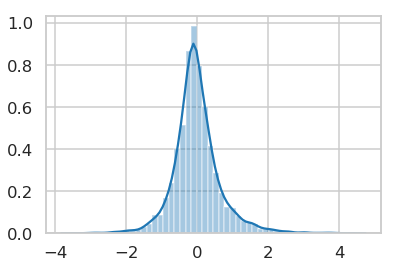

In [19]:
# Calculate residuals
residual = y_test - y_pred

# Plot distribution
sns.distplot(residual)

- The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual. Examining residuals is a key part of all statistical modeling.
- As the he residual plot above showing normal distribution we can say that the error terms are normally distributed.
- This satisfies one of the assumptions for regression analysis that, the residuals are normally distributed. So, if our residuals are normal, it means that our assumption is valid and model predictions should also be valid.

#### Plotting the residuals agains observed

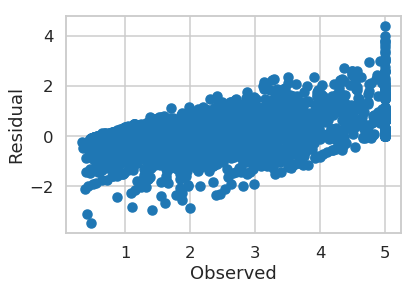

In [20]:
# Scatterplot of residuals vs observed values
plt.scatter(y_test ,residual)
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.show()

- Above scatter plot is showing the residuals on the vertical axis and the observed y values on the horizontal axis. The plot is used to detect non-linearity, unequal error variances, and outliers.
- The plot suggests that there is a increasing linear relationship between observed and residual values. It also suggests that there are no unusual data points in the data set. 
- And, it illustrates that the variation across the data is constant suggesting that the assumption of (equal) normal test error variances is reasonable.
- This residuals plot shows data that meet the assumptions of homoscedasticity, linearity, and normality because the residual plot is rectangular, with a concentration of points along the center and same finite variance across length.

#### #### Plotting the residuals agains predicted

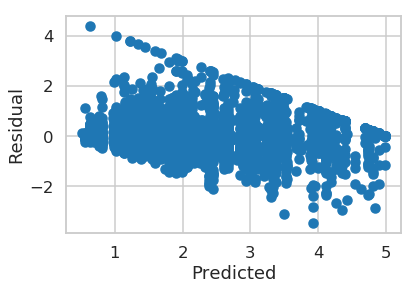

In [22]:
# Scatterplot of residuals vs predicted
plt.scatter(y_pred ,residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

- Above scatter plot is showing the residuals on the vertical axis and the predicted y values on the horizontal axis. The plot is used to detect non-linearity, unequal error variances, and outliers.
- The plot suggests that there is a decreasing linear relationship between predicted and residual values. It also suggests that there are not much unusual data points in the data set except at the tails.
- And, it illustrates that the variation across the data is constant suggesting that the assumption of (equal) normal test error variances is reasonable.
- This residuals plot shows data that meet the assumptions of homoscedasticity, linearity, and normality because the residual plot is rectangular, with a concentration of points along the center and same finite variance across length.
- So we can comment that, our regression model is performing well based on assumptions above.

### Predict the average price of a house in a block with: MedInc of 8.3252, HouseAge=21, AveRooms=8, AveBedrms=2, Population=600, AveOccup=3, Latitude=37.85, Longitude=-122.26.

In [23]:
# Predict target for given features
cls.predict([[8.3252, 21, 8, 2, 600, 3, 37.85, -122.26]])

array([4.74218808])

Predicted value of target - median house value in a block is about 4.72 for given feature values
***

**References:**
- Abrams, D. R. (2007). DSS - Introduction to Regression. Retrieved December 14, 2018, from https://dss.princeton.edu/online_help/analysis/regression_intro.htm
- Are the model residuals well-behaved? (n.d.). Retrieved December 14, 2018, from https://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
- 4.2 - Residuals vs. Fits Plot. (n.d.). Retrieved December 14, 2018, from https://onlinecourses.science.psu.edu/stat501/node/277/